In [2]:
import matplotlib.pyplot as plt
import yfinance as yf
from prophet import Prophet

In [3]:
df = yf.download('BTC-USD', start='2017-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-31,960.627014,963.742981,947.236023,963.742981,963.742981,99135104
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
...,...,...,...,...,...,...
2022-01-21,40699.605469,41060.527344,35791.425781,36457.316406,36457.316406,43011992031
2022-01-22,36471.589844,36688.812500,34349.250000,35030.250000,35030.250000,39714385405
2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,26017975951


In [5]:
df = df.reset_index()

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-31,960.627014,963.742981,947.236023,963.742981,963.742981,99135104
1,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
3,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
4,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
...,...,...,...,...,...,...,...
1847,2022-01-21,40699.605469,41060.527344,35791.425781,36457.316406,36457.316406,43011992031
1848,2022-01-22,36471.589844,36688.812500,34349.250000,35030.250000,35030.250000,39714385405
1849,2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,26017975951
1850,2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597


In [7]:
df[['ds', 'y']] = df[['Date', 'Adj Close']]

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2016-12-31,960.627014,963.742981,947.236023,963.742981,963.742981,99135104,2016-12-31,963.742981
1,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,2017-01-01,998.325012
2,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,2017-01-02,1021.750000
3,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,2017-01-03,1043.839966
4,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,2017-01-04,1154.729980
...,...,...,...,...,...,...,...,...,...
1847,2022-01-21,40699.605469,41060.527344,35791.425781,36457.316406,36457.316406,43011992031,2022-01-21,36457.316406
1848,2022-01-22,36471.589844,36688.812500,34349.250000,35030.250000,35030.250000,39714385405,2022-01-22,35030.250000
1849,2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,26017975951,2022-01-23,36276.804688
1850,2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597,2022-01-24,36654.328125


In [9]:
model = Prophet()

In [10]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = model.make_future_dataframe(365)

In [12]:
forecast = model.predict(future)

In [13]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-12-31,-2229.383006,-8981.519074,2922.230091,-2229.383006,-2229.383006,-655.646641,-655.646641,-655.646641,26.409945,26.409945,26.409945,-682.056586,-682.056586,-682.056586,0.0,0.0,0.0,-2885.029647
1,2017-01-01,-2195.522406,-8929.426550,3473.372636,-2195.522406,-2195.522406,-624.279256,-624.279256,-624.279256,7.163211,7.163211,7.163211,-631.442467,-631.442467,-631.442467,0.0,0.0,0.0,-2819.801663
2,2017-01-02,-2161.661807,-8905.455188,3310.181510,-2161.661807,-2161.661807,-596.311907,-596.311907,-596.311907,2.082112,2.082112,2.082112,-598.394019,-598.394019,-598.394019,0.0,0.0,0.0,-2757.973714
3,2017-01-03,-2127.801207,-8695.206036,3717.354738,-2127.801207,-2127.801207,-643.470099,-643.470099,-643.470099,-59.913270,-59.913270,-59.913270,-583.556830,-583.556830,-583.556830,0.0,0.0,0.0,-2771.271306
4,2017-01-04,-2093.940607,-9055.892212,2827.519847,-2093.940607,-2093.940607,-542.698017,-542.698017,-542.698017,44.460050,44.460050,44.460050,-587.158067,-587.158067,-587.158067,0.0,0.0,0.0,-2636.638624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,2023-01-21,71448.919867,52825.966291,83521.230507,55357.342520,84248.209422,-1868.722239,-1868.722239,-1868.722239,26.409945,26.409945,26.409945,-1895.132185,-1895.132185,-1895.132185,0.0,0.0,0.0,69580.197628
2213,2023-01-22,71495.009024,52831.113884,84323.719508,55349.109749,84401.324831,-1901.329116,-1901.329116,-1901.329116,7.163211,7.163211,7.163211,-1908.492326,-1908.492326,-1908.492326,0.0,0.0,0.0,69593.679908
2214,2023-01-23,71541.098180,52289.098991,84748.889807,55340.876979,84503.300153,-1896.569616,-1896.569616,-1896.569616,2.082112,2.082112,2.082112,-1898.651727,-1898.651727,-1898.651727,0.0,0.0,0.0,69644.528565
2215,2023-01-24,71587.187337,53053.936893,84323.378331,55332.644208,84617.774940,-1924.237960,-1924.237960,-1924.237960,-59.913270,-59.913270,-59.913270,-1864.324690,-1864.324690,-1864.324690,0.0,0.0,0.0,69662.949376


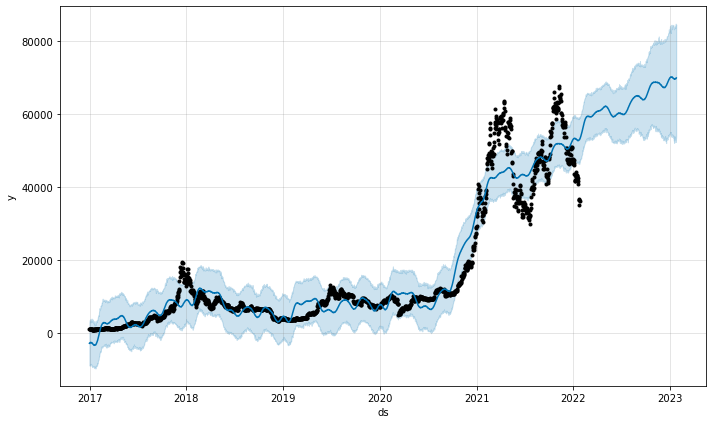

In [15]:
model.plot(forecast)
plt.show()

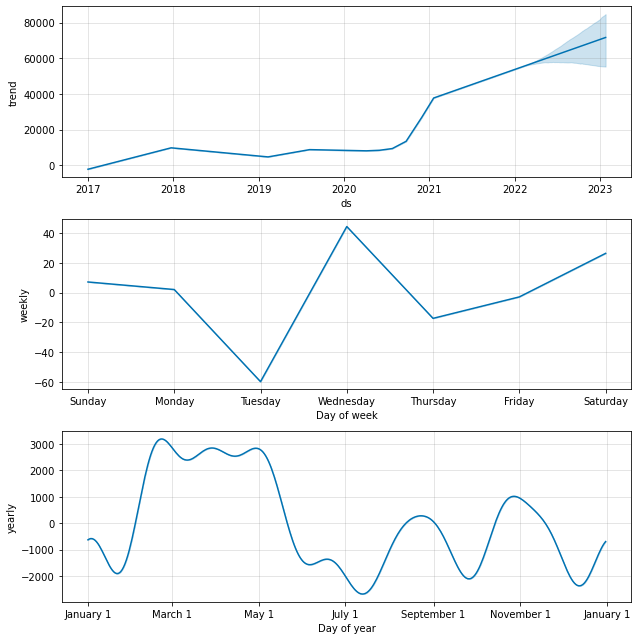

In [16]:
model.plot_components(forecast)
plt.show()